In [17]:
from sympy import *
from sympy.abc import x, t
init_printing()
def full_simplify(expr):
    cur = expr
    while True:
        nxt = simplify(cur)
        if cur == nxt:
            return cur
        cur = nxt

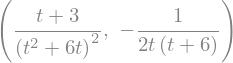

In [19]:
expr = (t+3)/(t**2 + 6*t)**2
expr, full_simplify(integrate(expr))

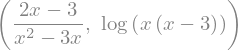

In [13]:
expr = (2*x - 3)/(x**2 - 3*x)
expr, full_simplify(integrate(expr))

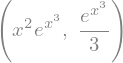

In [31]:
expr = (x**2) * exp(x**3)
expr, manualintegrate(expr, x)

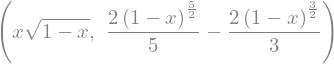

In [36]:
expr = x * sqrt(1-x)
from sympy.integrals.manualintegrate import manualintegrate, integral_steps
from sympy.integrals.heurisch import heurisch
expr, manualintegrate(expr, x)

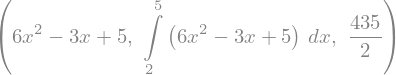

In [51]:
expr = 6*x**2 - 3*x + 5
a, b = 2, 5
expr, manualintegrate(expr, (x, a, b)), integrate(expr, (x, a, b))

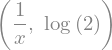

In [53]:
expr = 1/x
a, b = 1, 2
expr, integrate(expr, (x, a, b))

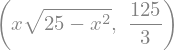

In [57]:
expr = x*sqrt(25 - x**2)
a, b = 0, 5
expr, integrate(expr, (x, a, b))

In [58]:
expr = x**2 - 4
abs(float(integrate(expr, (x, 0, 2)))) + float(integrate(expr, (x, 2, 4)))

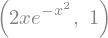

In [60]:
expr = 2*x*exp(-x**2)
a, b = 0, oo
expr, integrate(expr, (x, a, b))

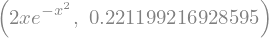

In [61]:
expr = 2*x*exp(-x**2)
a, b = 0, 0.5
expr, integrate(expr, (x, a, b))

In [75]:
expr = (3/26)*x**2
a, b = 1, 3
mu = integrate((expr)*x, (x, a, b))
s_2 = integrate((expr)*(x-mu)**2, (x, a, b))
print("expr, limit, mu, variance, std-deviation")
expr, integrate(expr, (x, a, b)), mu, s_2, sqrt(s_2)

expr, limit, mu, variance, std-deviation


expr, limit, mu, variance, std-deviation


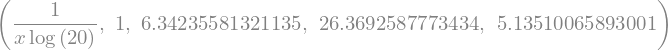

In [83]:
expr = 1/(ln(20)*x)
a, b = 1, 20
mu = integrate((expr)*x, (x, a, b))
var = integrate((expr)*(x-mu)**2, (x, a, b))
stdev = sqrt(var)
print("expr, limit, mu, variance, std-deviation")
expr, integrate(expr, (x, a, b)), float(mu), float(var), float(stdev)

In [88]:
u = float(mu - stdev)
v = float(mu + stdev)
print(f"[{u}, {v}]")
float(integrate(expr, (x, u, v)))

[1.2072551542813414, 11.477456472141352]


In [97]:
def analyze_pdf(f, x, a=0, b=oo):
    mu = integrate((f)*x, (x, a, oo))
    var = integrate((f)*(x-mu)**2, (x, a, oo))
    stdev = sqrt(var)
    print(f"integral from (a, b): {float(integrate(f, (x, a, b)))}")
    print(f"mu: {float(mu)}")
    print(f"variance: {float(var)}")
    print(f"stdev: {float(stdev)}")
    return f
analyze_pdf((1/20)*exp(-x/20), x, b=100)

integral from (a, b): 0.9932620530009145
mu: 20.0
variance: 400.0
stdev: 20.0


In [153]:
from scipy.stats import norm

In [146]:
mu = 75
std = 16
zscore = lambda z: (z - mu)/std
zs = zscore(67)
print(f"AUC up to {zs} = {1 - norm.cdf(zs)}")

AUC up to -0.5 = 0.6914624612740131


In [147]:
mu = 75
std = 16
zscore = lambda z: (z - mu)/std
norm.cdf(zscore(70)) - norm.cdf(zscore(61))

In [152]:
inv_zscore = lambda x: x * std  + mu
inv_zscore(norm.ppf(.20)), inv_zscore(norm.ppf(.80))

In [323]:
# Empirical Rule
# 68% of data between 1 std from mean (u-std, u+std)
# 95% of data between 2 std from mean (u-2*std, u+2*std)
# 99.7% of data between 3 std from mean (u-3*std, u+3*std)
(64-55)/9
#95/2

In [157]:
from scipy.stats import norm
mu = 78
std = 6
zscore = lambda z: (z - mu)/std
norm.cdf(zscore(96)) - norm.cdf(zscore(84))

In [344]:
ts = [0,3,6,9,12,15,18]
vs = [0,7,23,42,53,51,38]
dt = 3
# using 4 because its 4 seconds between each step
print(f"L6: {sum([dt*v for v in vs[:-1]])}")
print(f"R6: {sum([dt*v for v in vs[1:]])}")
print(f"M3: {sum([7*dt*2 + 42*dt*2 + 51*dt*2])}")

L6: 528
R6: 642
M3: 600


In [185]:
[(ts[i+1]-ts[i]) for i in range(len(vs) - 1)]

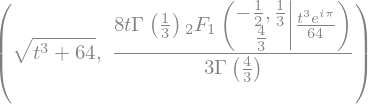

In [256]:
expr=sqrt(t**3 + 4**3)

expr, integrate(expr, t)

In [221]:
expr = 500+600*x-180*x**2
expr, integrate(expr, (x, 0, 1))

In [246]:
expr = -0.001*x**2 + 0.1*x
expr, integrate(expr, (x, 0, 7)) + 16

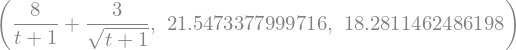

In [248]:
expr = 8/(t + 1) + 3/sqrt(t + 1)
expr, float(integrate(expr, (t, 1, 8))), float(integrate(expr, (t, 8, 22)))

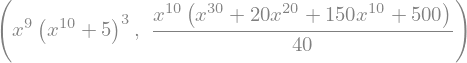

In [250]:
expr = (x**9)*(x**10 + 5)**3
expr, full_simplify(integrate(expr, x))

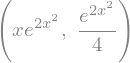

In [253]:
expr = x*exp(2*(x)**2)
expr, full_simplify(integrate(expr, x))

In [257]:
0.2 * (27 - 24)

In [258]:
0.2 * (29 - 25)

In [264]:
# Uniform distribution calculations
f_x0 = 16
f_xmax = 24
print(f"Q1: {f_x0 + (f_xmax - f_x0)*0.25}")
print(f"Q2: {f_x0 + (f_xmax - f_x0)*0.5}")
print(f"Q3: {f_x0 + (f_xmax - f_x0)*0.75}")
print(f"IQR: {(f_x0 + (f_xmax - f_x0)*0.75) - (f_x0 + (f_xmax - f_x0)*0.25)}")

Q1: 18.0
Q2: 20.0
Q3: 22.0
IQR: 4.0


In [265]:
0.125 * (21 - 16), 0.125 * (24 - 23)

In [285]:
expon = lambda l, x: (1/l)*exp((1/-l)*x) 

In [288]:
(1 - integrate(expon(2.8, x), (x, 0, 0.5))) * 140 * 270

In [287]:
plotting.plot(expon(2.8, x))

     13 |.                                                      
        |                                                       
        |                                                       
        | .                                                     
        |                                                       
        |  .                                                    
        |                                                       
        |   .                                                   
        |    .                                                  
        |                                                       
    6.5 |-----.-------------------------------------------------
        |      \                                                
        |       \                                               
        |        \                                              
        |         \                                             
        |          ..    

In [299]:
mu = 3.67
expr_cdf = lambda t: 1 - exp(-t/mu)
price = 140
units = 220
expr_cdf(0.5) * price * units + (expr_cdf(1) - expr_cdf(0.5)) * (price/2) * units

In [302]:
plotting.plot((1/mu)*exp(-t/mu))

    4.2 |.                                                      
        |                                                       
        | .                                                     
        |                                                       
        |  .                                                    
        |   .                                                   
        |                                                       
        |    .                                                  
        |     \                                                 
        |      \                                                
    2.1 |-------\-----------------------------------------------
        |        \                                              
        |         \                                             
        |          ..                                           
        |            \                                          
        |             .. 

In [307]:
expr = 5*exp(-5*t)
integrate(expr, (t, 0, 50/60))

In [314]:
mu = 65
std = 8
zscore = lambda x: (x - mu)/std
norm.cdf(zscore(81)) - norm.cdf(zscore(65))

In [311]:
# from scipy.stats import norm
mu_man = 69.4
std_man = 2.69
zscore_man = lambda x: (x - mu_man)/std_man

mu_woman = 64.1
std_woman = 2.51
zscore_woman = lambda x: (x - mu_woman)/std_woman

q1 = 12*6 + 3
print(f"a: {zscore_man(q1)}")
print(f"b: {norm.cdf(zscore_man(q1))}")

q2 = 5*12 + 11
print(f"c: {zscore_woman(q2)}")
print(f"d: {1 - norm.cdf(zscore_woman(q2))}")

a: 2.081784386617098
b: 0.9813189157359767
c: 2.7490039840637475
d: 0.0029888329822720383


In [316]:
mu = 245
std = 46
zscore = lambda x: (x - mu)/std
print(f"a: {norm.cdf(zscore(210))}")
print(f"b: {1 - norm.cdf(zscore(222))}")

a: 0.22336748927930133
b: 0.6914624612740131
